In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
%matplotlib inline
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\data_prep_functions.ipynb"
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\data_analysis_functions.ipynb"

#### <font color='darkorange'> Read the data (test runs below 15 seconds)

In [21]:
file_path = "C:/Users/anasofiaccruz/Desktop/Optogenetics processed data/below15_runs.csv"
below15 = pd.read_csv(file_path)

In [22]:
below15.head()

,session,rat,run_nr,start_timestamp,run_type,stim_condition,outcome,group,cp_entry_timestamp,cp_exit_timestamp,latency_to_cp_entry,latency_to_cp_exit,time_in_cp
0,2019-08-08T12_41_07,NPHR1,6.0,368.579635,T,1,1.0,NPHR,371.569088,372.640947,2.989453,4.061312,1.071859
1,2019-08-08T12_41_07,NPHR1,10.0,751.518003,T,3,1.0,NPHR,755.435469,756.431386,3.917466,4.913382,0.995917
2,2019-08-08T12_41_07,NPHR1,14.0,954.084992,T,3,0.0,NPHR,957.866982,958.900954,3.781990,4.815962,1.033971
3,2019-08-08T12_41_07,NPHR1,18.0,1151.446016,T,0,1.0,NPHR,1153.832614,1154.563149,2.386598,3.117133,0.730534
4,2019-08-08T12_41_07,NPHR1,22.0,1375.846490,T,3,1.0,NPHR,1378.606669,1379.300582,2.760179,3.454093,0.693914


#### <font color='darkorange'> Remove baseline trials

In [23]:
below15 = below15[(below15['stim_condition']!=-1)]
below15['stim_condition'].unique()

array([1, 3, 0], dtype=int64)

In [24]:
counts=below15.groupby(['group','stim_condition']).count()['session']
counts

group  stim_condition
CTRL   0                  954
       1                  808
       3                  937
NPHR   0                 1196
       1                 1192
       3                 1164
Name: session, dtype: int64

#### <font color = 'darkorange'> Subdivision by outcome

In [25]:
errors=below15[below15['outcome']==0]
errors.groupby(['group', 'stim_condition'])['run_nr'].count()

group  stim_condition
CTRL   0                 174
       1                 152
       3                 202
NPHR   0                 215
       1                 204
       3                 256
Name: run_nr, dtype: int64

In [26]:
corrects=below15[below15['outcome']==1]
corrects.groupby(['group', 'stim_condition'])['run_nr'].count()

group  stim_condition
CTRL   0                 780
       1                 656
       3                 735
NPHR   0                 981
       1                 988
       3                 908
Name: run_nr, dtype: int64

#### <font color='darkorange'> Latency distributions of error trials within group: no vs. sample and no vs. test

In [27]:
errors_no_vs_sample = errors[errors['stim_condition']!=3]

<Figure size 1800x1200 with 0 Axes>

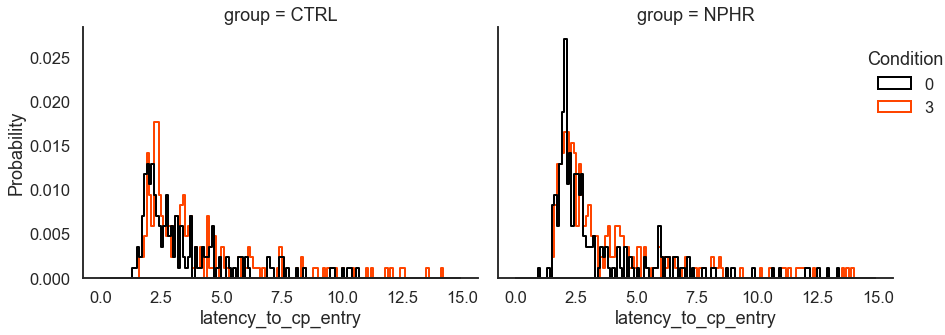

<Figure size 1800x1200 with 0 Axes>

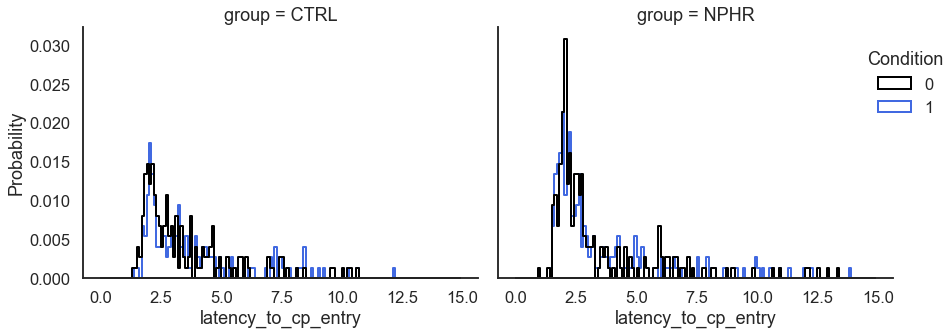

<Figure size 1800x1200 with 0 Axes>

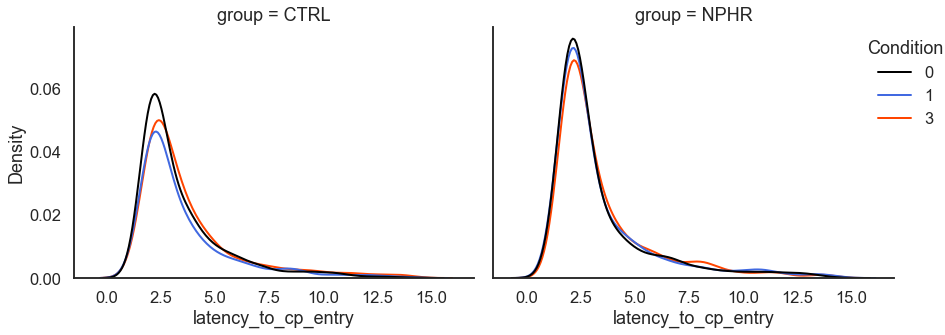

In [36]:
errors_no_vs_test = errors[errors['stim_condition']!=1]
g = plot_latency_distributions_within_group(
    errors_no_vs_test, 
    'hist',
    'latency_to_cp_entry',
    ['black', 'orangered'])
b = plot_latency_distributions_within_group(
    errors_no_vs_sample, 
    'hist',
    'latency_to_cp_entry',
    ['black', 'royalblue'])
a = plot_latency_distributions_within_group(
    below15, 
    'kde',
    'latency_to_cp_entry',
    ['black', 'royalblue', 'orangered'])

#### <font color='darkorange'> Cumulative latency distributions  of error trials within group

<Figure size 1800x1200 with 0 Axes>

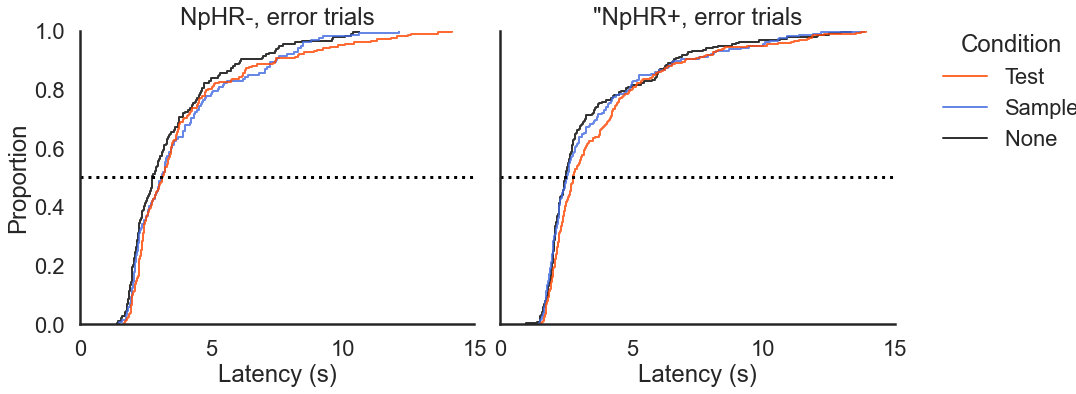

In [30]:
g = plot_cumulative_distributions_within_group(errors, 'latency_to_cp_entry')
titles = ['NpHR-, error trials', '"NpHR+, error trials']
i = 0
for ax in g.axes.flatten():  
    ax.axhline(0.5,color='black', linestyle='dotted')
    ax.set(xlabel='Latency (s)', xticks=range(0,20,5), xticklabels=range(0,20,5), title=titles[i])
    i+=1
sns.despine()

In [31]:
ctrl_none_errors = errors[(errors['stim_condition']==0) & (errors['group']=='CTRL')]
ctrl_sample_errors = errors[(errors['stim_condition']==1) & (errors['group']=='CTRL')]
ctrl_test_errors = errors[(errors['stim_condition']==3) & (errors['group']=='CTRL')]
nphr_none_errors = errors[(errors['stim_condition']==0) & (errors['group']=='NPHR')]
nphr_sample_errors = errors[(errors['stim_condition']==1) & (errors['group']=='NPHR')]
nphr_test_errors = errors[(errors['stim_condition']==3) & (errors['group']=='NPHR')]

#### <font color='darkorange'> Inference testing comparing the latency distributions of error trial within group: no vs. sample and no vs. test

In [32]:

a = [ctrl_none_errors, ctrl_none_errors, nphr_none_errors, nphr_none_errors]
b = [ctrl_sample_errors, ctrl_test_errors, nphr_sample_errors, nphr_test_errors]
results = inference_testing_mannwhitneyu(a,b,'latency_to_cp_entry')
#Alpha with bonferroni correction = 0.05/2 = 0.025
results

,a_group,b_group,a_condition,b_condition,a_outcome,b_outcome,u,p
0,CTRL,CTRL,0.0,1.0,0.0,0.0,11993.0,0.147213
1,CTRL,CTRL,0.0,3.0,0.0,0.0,15324.0,0.032298
2,NPHR,NPHR,0.0,1.0,0.0,0.0,21638.0,0.813998
3,NPHR,NPHR,0.0,3.0,0.0,0.0,23880.5,0.013390


#### <font color='darkorange'> Comparing outcome distributions

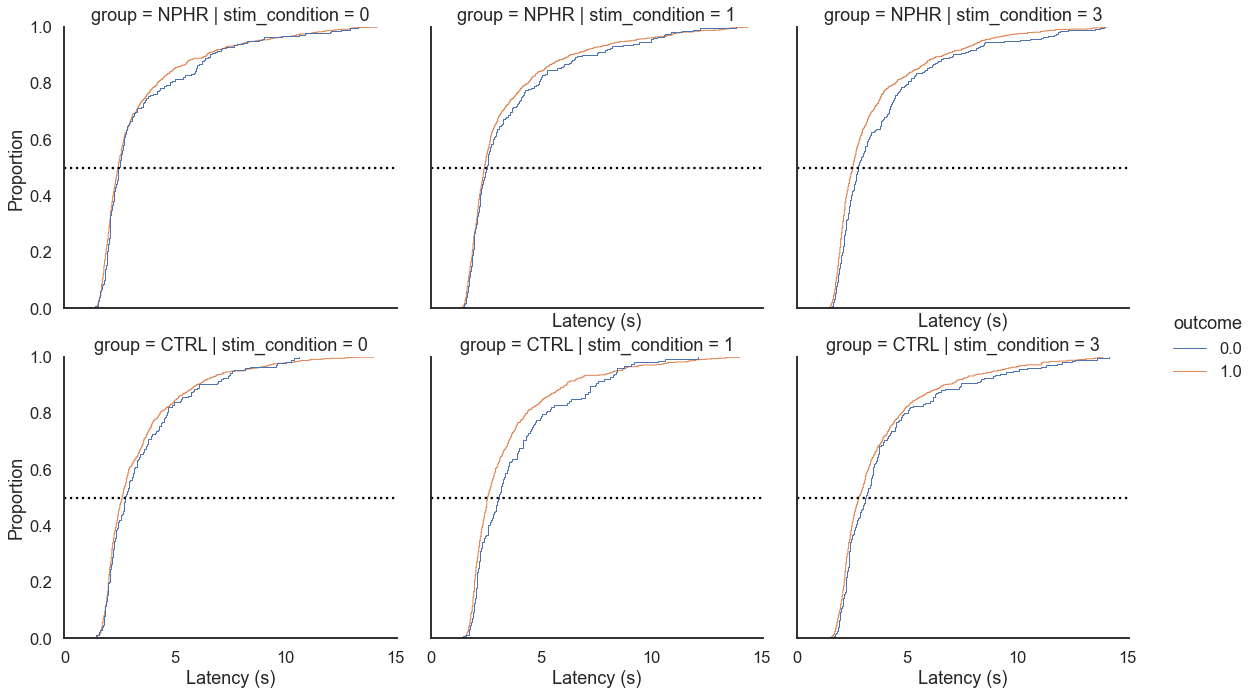

In [33]:
sns.set(style='white', context='talk')
g = sns.displot(kind='ecdf', data=below15, col='stim_condition', row='group', x='latency_to_cp_entry',
            stat='proportion', hue='outcome', linewidth=1, height=5, aspect=1.1)
for ax in g.axes.flatten():  
    ax.axhline(0.5,color='black', linestyle='dotted')    
g.set(xlabel='Latency (s)', xticks=range(0,20,5), xticklabels=range(0,20,5))
axes = g.axes.flatten()
sns.despine()

In [34]:
ctrl_none_corrects = corrects[(corrects['stim_condition']==0) & (corrects['group']=='CTRL')]
ctrl_sample_corrects = corrects[(corrects['stim_condition']==1) & (corrects['group']=='CTRL')]
ctrl_test_corrects = corrects[(corrects['stim_condition']==3) & (corrects['group']=='CTRL')]

nphr_none_corrects = corrects[(corrects['stim_condition']==0) & (corrects['group']=='NPHR')]
nphr_sample_corrects = corrects[(corrects['stim_condition']==1) & (corrects['group']=='NPHR')]
nphr_test_corrects = corrects[(corrects['stim_condition']==3) & (corrects['group']=='NPHR')]

####  Inference testing 

In [35]:
a = [ctrl_none_errors, ctrl_sample_errors,ctrl_test_errors, 
     nphr_none_errors, nphr_sample_errors, nphr_test_errors]
b = [ctrl_none_corrects, ctrl_sample_corrects, ctrl_test_corrects,
     nphr_none_corrects, nphr_sample_corrects, nphr_test_corrects]
results = inference_testing_mannwhitneyu(a,b,'latency_to_cp_entry')
results

,a_group,b_group,a_condition,b_condition,a_outcome,b_outcome,u,p
0,CTRL,CTRL,0.0,0.0,0.0,1.0,71310.0,0.293903
1,CTRL,CTRL,1.0,1.0,0.0,1.0,56816.5,0.007265
2,CTRL,CTRL,3.0,3.0,0.0,1.0,80235.5,0.078196
3,NPHR,NPHR,0.0,0.0,0.0,1.0,109336.5,0.397788
4,NPHR,NPHR,1.0,1.0,0.0,1.0,105158.5,0.327617
5,NPHR,NPHR,3.0,3.0,0.0,1.0,130377.5,0.002889
